In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/diabetes.csv')

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

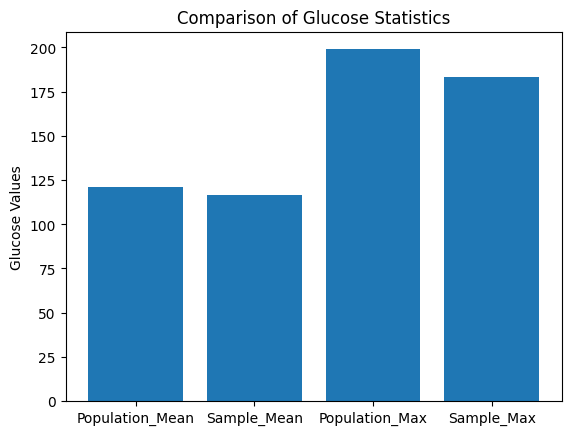

In [18]:

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

sample = data.sample(25)

# Calculating statistics
population_mean = data['Glucose'].mean()
sample_mean = sample['Glucose'].mean()
population_max = data['Glucose'].max()
sample_max = sample['Glucose'].max()

# Creating labels and values for the bar chart
labels = ['Population_Mean', 'Sample_Mean', 'Population_Max','Sample_Max']
values = [population_mean, sample_mean, population_max, sample_max]

# Creating the bar chart
plt.bar(labels, values)
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.savefig('/visualization_1.png')
plt.show()


b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

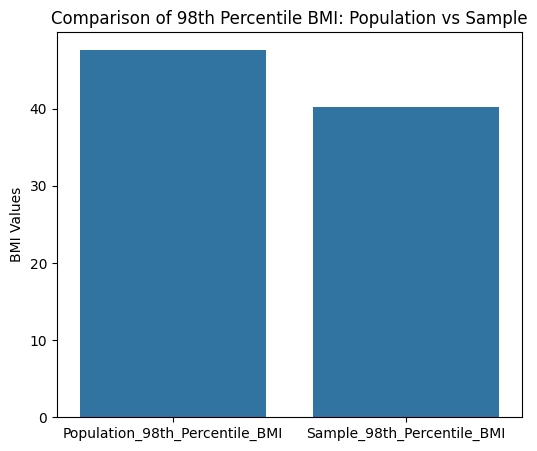

In [19]:
import seaborn as sns

# Calculate 98th percentile of BMI for both population and sample
Population_bmi = np.percentile(data['BMI'], 98)
Sample_bmi = np.percentile(sample['BMI'], 98)

# Comparison using charts
plt.figure(figsize=(6, 5))
sns.barplot(x=['Population_98th_Percentile_BMI', 'Sample_98th_Percentile_BMI'],
            y=[Population_bmi, Sample_bmi])
plt.title('Comparison of 98th Percentile BMI: Population vs Sample')
plt.ylabel('BMI Values')
plt.savefig('/visualization_2.png')
plt.show()


c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

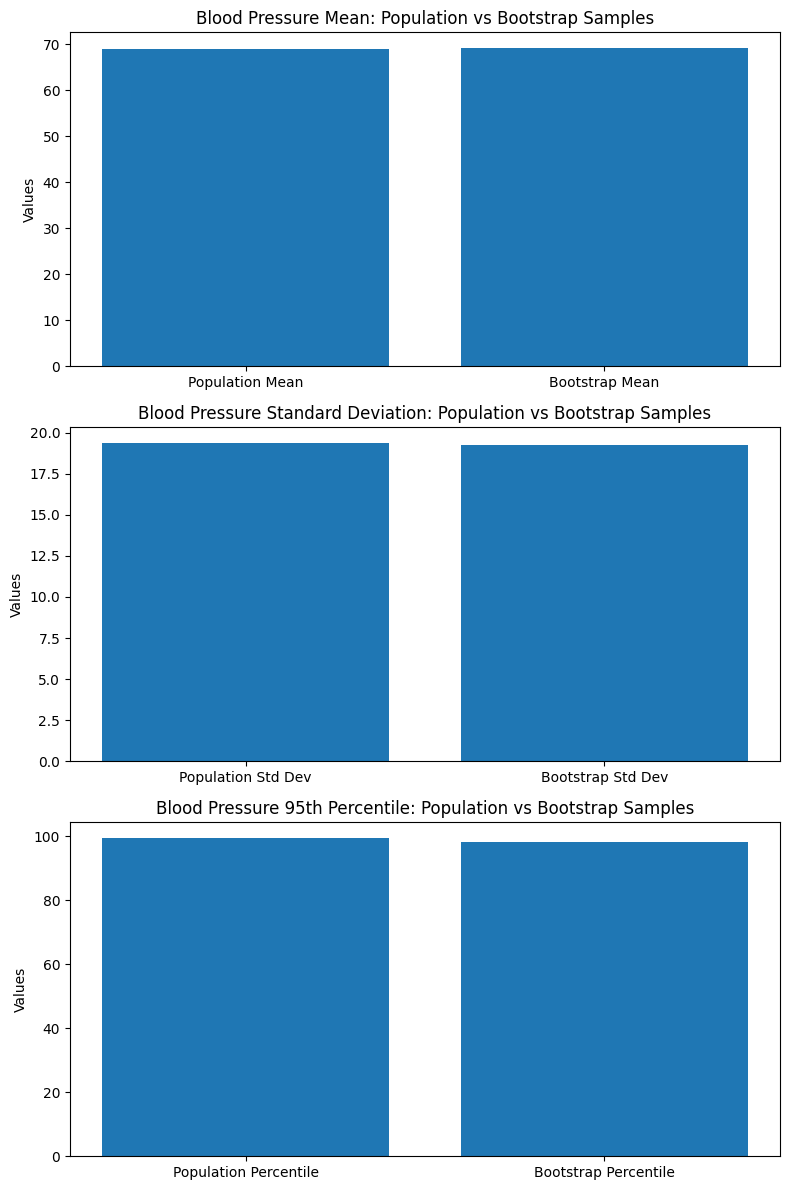

In [20]:
# Set parameters
bootstrap_samples = 500
sample_size = 150

# Generating bootstrap samples and calculating statistics

bootstrap_means_bp = np.array([data['BloodPressure'].sample(sample_size, replace=True).mean()
for _ in range(bootstrap_samples)])
bootstrap_std_devs = np.array([data['BloodPressure'].sample(sample_size, replace=True).std()
for _ in range(bootstrap_samples)])
bootstrap_percentiles = np.array([np.percentile(data['BloodPressure'].sample(sample_size, replace=True), 98)
for _ in range(bootstrap_samples)])

# Calculating population statistics

population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)

# Calculating mean of bootstrap statistics

bs_mean = np.mean(bootstrap_means_bp)
bs_std = np.mean(bootstrap_std_devs)
bs_per = np.mean(bootstrap_percentiles)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bs_mean])
axs[0].set_ylabel('Values')
axs[0].set_title('Blood Pressure Mean: Population vs Bootstrap Samples')
plt.savefig('/visualization_3.png')

axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bs_std])
axs[1].set_ylabel('Values')
axs[1].set_title('Blood Pressure Standard Deviation: Population vs Bootstrap Samples')
plt.savefig('/visualization_4.png')

axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bs_per])
axs[2].set_ylabel('Values')
axs[2].set_title('Blood Pressure 95th Percentile: Population vs Bootstrap Samples')
plt.savefig('/visualization_5.png')

plt.tight_layout()
plt.show()
